# Data Preprocessing Project

## Team members

Phuc Dinh\
Brian Shao\
Steven Ho\
Alex Souv\
Navteg Khalsa\
Moshley Marcelo

## Import required modules

In [1]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## Data Preprocessing

### Dataset 1 (London Air)
In this dataset, we use these techniques: dropping fields, removing rows with missing values

#### Import data

In [2]:
laqndata = pd.read_csv('https://raw.githubusercontent.com/dinhphucv/CSC-177/main/Data%20Preprocessing%20Project/data/LaqnData.csv')

In [3]:
laqndata.iloc[0:5]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2022 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2022 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2022 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2022 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2022 01:00,NaN,mg m-3,P


#### Remove unnecessary columns
This piece of code allows us to remove column 'Provisional or Ratified' which is not necessary.

In [4]:
laqndata.drop(columns=['Provisional or Ratified'], axis=1, inplace=True)

#### Drop rows with missing values
As we can see from the tabular above, some values are NaN. The code below is used to drop all rows with missing values

In [5]:
print('Number of rows in original data:', laqndata.shape[0])
laqndata.dropna(inplace=True)
laqndata
print('Number of rows after removing NaN:', laqndata.shape[0])

Number of rows in original data: 175200
Number of rows after removing NaN: 104596


In [6]:
laqndata.iloc[0:5]

,Site,Species,ReadingDateTime,Value,Units
35040,HI0,NO,01/01/2022 00:00,2.4,ug m-3
35041,HI0,NO,01/01/2022 00:15,2.4,ug m-3
35042,HI0,NO,01/01/2022 00:30,2.4,ug m-3
35043,HI0,NO,01/01/2022 00:45,2.4,ug m-3
35044,HI0,NO,01/01/2022 01:00,1.2,ug m-3


### Dataset 2 (UNSW-NB15)
In this dataset, we use these techniques to clean the dataset: dropping fields, removing duplicated rows

#### Import data

In [7]:
unsw_nb15 = pd.read_csv('https://github.com/dinhphucv/CSC-177/raw/main/Data%20Preprocessing%20Project/data/UNSW_NB15.csv')

In [8]:
unsw_nb15.iloc[0:5]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


#### Check and save 'unsw_nb15' dataset shape

In [9]:
unsw_nb15_original_shape = unsw_nb15.shape
print('Number of instances/records:', unsw_nb15_original_shape[0])
print('Number of features/attributes:', unsw_nb15_original_shape[1])

Number of instances/records: 175341
Number of features/attributes: 45


#### Remove unnecessary columns
The code below allows us to remove multiple categorical ('id' and 'attack_cat') as we are only interested in whether the connect is an attack rather than the attack type. Also, the id shouldn't have any meaning or effect on the output.

In [10]:
unsw_nb15.drop(columns=['id', 'attack_cat'], axis=1, inplace=True)

#### Check and remove duplicated rows
Here, we remove all duplicated rows. We have to do this after removing 'id' columns as the id may prevent us from remove duplicating data.

In [11]:
print('Duplicated rows in \'unsw_nb15\' dataset:', unsw_nb15.duplicated().sum())
if unsw_nb15.duplicated().sum() > 0:
  unsw_nb15.drop_duplicates(inplace=True)

Duplicated rows in 'unsw_nb15' dataset: 74072


In [12]:
print('\'unsw_nb15\' original shape:', unsw_nb15_original_shape)
print('\'unsw_nb15\' current shape:', unsw_nb15.shape)

'unsw_nb15' original shape: (175341, 45)
'unsw_nb15' current shape: (101269, 43)


### Dataset 3 (diabetes)
In this dataset, we use these techniques: shuffling, sorting,saving dataframe

#### Import data

In [13]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/dinhphucv/CSC-177/main/Data%20Preprocessing%20Project/data/diabetes.csv')

In [14]:
diabetes.iloc[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Check and save 'diabetes' dataset shape

In [15]:
diabetes_original_shape = diabetes.shape
print('Number or instances/records:', diabetes_original_shape[0])
print('Number or features/attributes:', diabetes_original_shape[1])

Number or instances/records: 768
Number or features/attributes: 9


#### Check and remove duplicated rows

In [16]:
print('Duplicated rows in \'diabetes\' dataset:', diabetes.duplicated().sum())

Duplicated rows in 'diabetes' dataset: 0


#### Outliers

In [17]:
diabetes[diabetes.columns.difference(['Outcome'])].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       768 non-null    int64  
 1   BMI                       768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Glucose                   768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   Pregnancies               768 non-null    int64  
 7   SkinThickness             768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<Axes: >

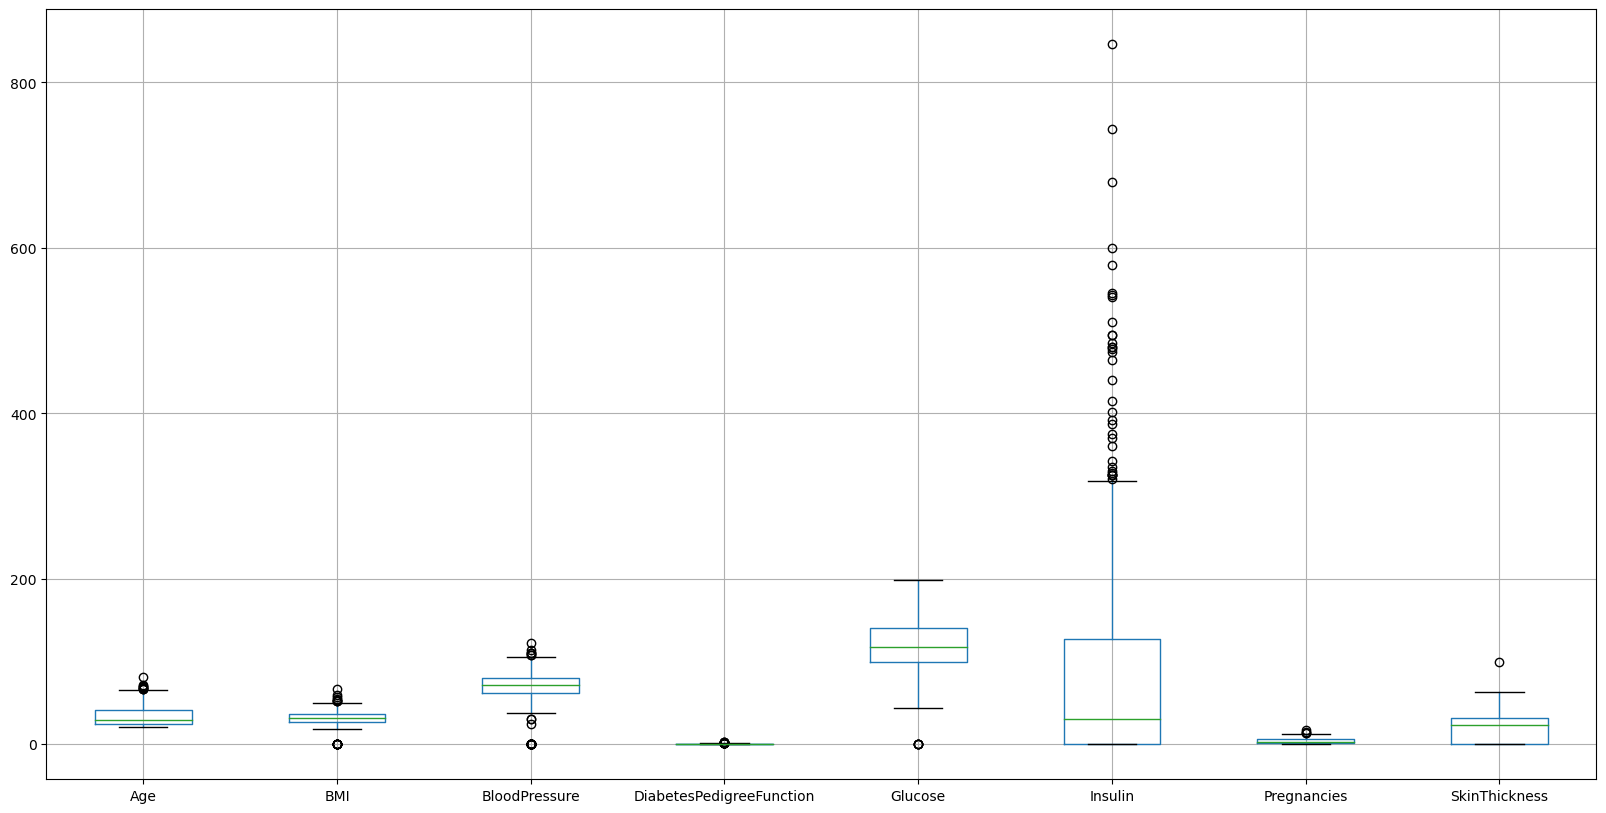

In [18]:
diabetes_2 = diabetes[diabetes.columns.difference(['Outcome'])].copy()
diabetes_2.boxplot(figsize=(20,10))

The boxplots suggest that there're some abnormally high values in all columns. The code below shows the results of standardizing the columns of the data. We also discarding the outliner with Z score > 3 or Z <=-3

In [19]:
Z = (diabetes_2-diabetes_2.mean())/diabetes_2.std()
Z

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
0,1.425067,0.203880,0.149543,0.468187,0.847771,-0.692439,0.639530,0.906679
1,-0.190548,-0.683976,-0.160441,-0.364823,-1.122665,-0.692439,-0.844335,0.530556
2,-0.105515,-1.102537,-0.263769,0.604004,1.942458,-0.692439,1.233077,-1.287373
3,-1.040871,-0.493721,-0.160441,-0.920163,-0.997558,0.123221,-0.844335,0.154433
4,-0.020483,1.408828,-1.503707,5.481337,0.503727,0.765337,-1.141108,0.906679
...,...,...,...,...,...,...,...,...
763,2.530487,0.115094,0.356200,-0.908090,-0.622237,0.869464,1.826623,1.721613
764,-0.530677,0.609757,0.046215,-0.398023,0.034575,-0.692439,-0.547562,0.405181
765,-0.275580,-0.734711,0.149543,-0.684747,0.003299,0.279412,0.342757,0.154433
766,1.169970,-0.240048,-0.470426,-0.370859,0.159683,-0.692439,-0.844335,-1.287373


In [20]:
Z2 = Z.loc[((Z > -3).sum(axis=1)==8) & ((Z <= 3).sum(axis=1)==8),:]
Z2


,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
0,1.425067,0.203880,0.149543,0.468187,0.847771,-0.692439,0.639530,0.906679
1,-0.190548,-0.683976,-0.160441,-0.364823,-1.122665,-0.692439,-0.844335,0.530556
2,-0.105515,-1.102537,-0.263769,0.604004,1.942458,-0.692439,1.233077,-1.287373
3,-1.040871,-0.493721,-0.160441,-0.920163,-0.997558,0.123221,-0.844335,0.154433
5,-0.275580,-0.810813,0.252871,-0.817546,-0.153085,-0.692439,0.342757,-1.287373
...,...,...,...,...,...,...,...,...
763,2.530487,0.115094,0.356200,-0.908090,-0.622237,0.869464,1.826623,1.721613
764,-0.530677,0.609757,0.046215,-0.398023,0.034575,-0.692439,-0.547562,0.405181
765,-0.275580,-0.734711,0.149543,-0.684747,0.003299,0.279412,0.342757,0.154433
766,1.169970,-0.240048,-0.470426,-0.370859,0.159683,-0.692439,-0.844335,-1.287373


#### Shuffling dataframe
Here, we are shuffling dataframe

In [21]:
# np.random.seed(38)
temp_df = diabetes
temp_df = temp_df.reindex(np.random.permutation(temp_df.index))
temp_df.reset_index(inplace=True, drop=True)
temp_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,116,74,15,105,26.3,0.107,24,0
1,5,115,76,0,0,31.2,0.343,44,1
2,7,168,88,42,321,38.2,0.787,40,1
3,6,190,92,0,0,35.5,0.278,66,1
4,8,91,82,0,0,35.6,0.587,68,0
...,...,...,...,...,...,...,...,...,...
763,8,194,80,0,0,26.1,0.551,67,0
764,6,80,66,30,0,26.2,0.313,41,0
765,4,95,60,32,0,35.4,0.284,28,0
766,6,108,44,20,130,24.0,0.813,35,0


#### Sorting dataframe
The below code allows us to sort the data by 'Age' in ascending.

In [22]:
temp_df = diabetes.sort_values(by='Age', ascending=True)
temp_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,64,35,0,33.6,0.543,21,1
60,2,84,0,0,0,0.0,0.304,21,0
102,0,125,96,0,0,22.5,0.262,21,0
182,1,0,74,20,23,27.7,0.299,21,0
623,0,94,70,27,115,43.5,0.347,21,0
...,...,...,...,...,...,...,...,...,...
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0
666,4,145,82,18,0,32.5,0.235,70,1
453,2,119,0,0,0,19.6,0.832,72,0


#### Saving dataframe for later use
After doing some data preprocessing, we can export the dataframe as csv for later use. We can continue the work instead of redone it.

In [23]:
temp_df.to_csv('data/diabetes-age-sorted.csv', index=False)

### Dataset 4 (Mobile Phone Price)
In this dataset, we use these techniques: removing duplicated rows, concatenating, calculated fields

#### Import data

In [24]:
mobile_phone_price = pd.read_csv('https://raw.githubusercontent.com/dinhphucv/CSC-177/main/Data%20Preprocessing%20Project/data/Mobile_Phone_Price.csv')
mobile_phone_price

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


#### Concatenating
In this part, we replicate concatenating by creating multiple dataframes and concatenating them into one.

In [25]:
col_brand = mobile_phone_price['Brand']
col_model = mobile_phone_price['Model']
col_storage = mobile_phone_price['Storage ']
col_ram = mobile_phone_price['RAM ']
col_price = mobile_phone_price['Price ($)']

In [26]:
result = pd.concat([col_brand, col_model, col_storage, col_ram, col_price],axis=1)
result

,Brand,Model,Storage,RAM,Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,1199
2,OnePlus,9 Pro,128 GB,8 GB,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,279
4,Google,Pixel 6,128 GB,8 GB,799
...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,349
404,Apple,iPhone 12 Pro Max,128,6,1099
405,Oppo,Reno3,128,8,429


#### Removing certain characters in certain columns
As we see from the above tabular, the values for Storage, RAM, and Price are not formatted consistently. Some have 'GB', and some do not. The same thing happened with the Price column but with the character '$'. The below code is used to remove that inconsistency.

In [27]:
result.info()
for column in ['Storage ', 'RAM ']:
  result[column] = result[column].str.replace(r' ?GB', '', regex=True)
result['Price ($)'] = result['Price ($)'].str.replace('[$,]', '', regex=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      407 non-null    object
 1   Model      407 non-null    object
 2   Storage    407 non-null    object
 3   RAM        407 non-null    object
 4   Price ($)  407 non-null    object
dtypes: object(5)
memory usage: 16.0+ KB


#### Convert to numeric data type
After removing the inconsistent, the dtype of those columns is still an object. The below code is used to convert them back to numeric. If any non-numerics are still left in those columns, errors will occur. If it ran successfully, we converted them to numeric data type.

In [28]:
for column in ['Storage ', 'RAM ', 'Price ($)']:
  result[column] = pd.to_numeric(result[column])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      407 non-null    object
 1   Model      407 non-null    object
 2   Storage    407 non-null    int64 
 3   RAM        407 non-null    int64 
 4   Price ($)  407 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.0+ KB


#### Check and remove duplicated rows
In this step, we remove duplicated rows. We decided to do this after removing inconsistent and converting as there's a chance the collecter accidentally recollected the data and added inconsistent to it.

In [29]:
print('Duplicated rows in \'result\' dataset:', result.duplicated().sum())
if result.duplicated().sum() > 0:
  result.drop_duplicates(inplace=True)

Duplicated rows in 'result' dataset: 60


#### Calculated Fields
After removing all the duplicated, we can add a calculated field into the current dataframe. Here we add a new column 'Price (in VND)' and it will be calculated from 'Price ($)'. In this piece of code, we also use round() to round the output as Vietnamese currency is always integer.

In [30]:
result.insert(len(result.columns),'Price (VND)', (result['Price ($)']*24432.50).round().astype(int))
result

,Brand,Model,Storage,RAM,Price ($),Price (VND)
0,Apple,iPhone 13 Pro,128,6,999,24408068
1,Samsung,Galaxy S21 Ultra,256,12,1199,29294568
2,OnePlus,9 Pro,128,8,899,21964818
3,Xiaomi,Redmi Note 10 Pro,128,6,279,6816668
4,Google,Pixel 6,128,8,799,19521568
...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,329,8038292
402,Samsung,Galaxy Note20 5G,128,8,1049,25629692
403,Xiaomi,Mi 10 Lite 5G,128,6,349,8526942
404,Apple,iPhone 12 Pro Max,128,6,1099,26851318


#### Feature Normalization
In this step, I use the zscore function to calculate the zscore of 'RAM' and 'Price ($)'. These new values will help us to easily idicate whether the spec, price is below, near, or above the average. We decided to didn't calculate the zscore for Price in VND as it is just a calculated from other field and also has some rouding.

In [31]:
result['RAM '] = zscore(result['RAM '])
result['Price ($)'] = zscore(result['Price ($)'])
result

,Brand,Model,Storage,RAM,Price ($),Price (VND)
0,Apple,iPhone 13 Pro,128,0.045702,1.909644,24408068
1,Samsung,Galaxy S21 Ultra,256,2.485475,2.558537,29294568
2,OnePlus,9 Pro,128,0.858959,1.585197,21964818
3,Xiaomi,Redmi Note 10 Pro,128,0.045702,-0.426371,6816668
4,Google,Pixel 6,128,0.858959,1.260751,19521568
...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,-0.767556,-0.264148,8038292
402,Samsung,Galaxy Note20 5G,128,0.858959,2.071867,25629692
403,Xiaomi,Mi 10 Lite 5G,128,0.045702,-0.199259,8526942
404,Apple,iPhone 12 Pro Max,128,0.045702,2.234090,26851318


## Data split
In this part, we decided to work with our diabetes dataset as the dataset is pretty much clean and we want to predict diabetes based on other attribute. Here we use all of the columns exept the Outcome as x. And the Outcome column for Y. We split the data, 75% for training and 25% for testing

In [32]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/dinhphucv/CSC-177/main/Data%20Preprocessing%20Project/data/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
x = diabetes[diabetes.columns.difference(['Outcome'])]
y = diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [34]:
print(x.columns)

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'Pregnancies', 'SkinThickness'],
      dtype='object')


The below code is used to calculating the mean and std of certain columns in both training and testing set.

In [35]:
feature_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for column in feature_columns:
  print(column)
  print('\tTraining set mean:', x_train[column].mean())
  print('\tTesting set mean:', x_test[column].mean())
  print('\tTraining set std:', x_train[column].std())
  print('\tTesting set std:', x_test[column].std())

Glucose
	Training set mean: 120.52604166666667
	Testing set mean: 122.0
	Training set std: 31.30199630736171
	Testing set std: 33.96625982181027
BloodPressure
	Training set mean: 68.94965277777777
	Testing set mean: 69.57291666666667
	Training set std: 19.113006722286883
	Testing set std: 20.110555584040394
SkinThickness
	Training set mean: 20.73263888888889
	Testing set mean: 19.947916666666668
	Training set std: 15.694852459319465
	Testing set std: 16.72905100325358
Insulin
	Training set mean: 81.27256944444444
	Testing set mean: 75.38020833333333
	Training set std: 115.65762221613798
	Testing set std: 114.17978027672025
BMI
	Training set mean: 32.01597222222222
	Testing set mean: 31.922395833333336
	Training set std: 8.125176445501436
	Testing set std: 7.131822974665879
DiabetesPedigreeFunction
	Training set mean: 0.4719513888888889
	Testing set mean: 0.47165104166666666
	Training set std: 0.3358161055745912
	Testing set std: 0.3183402606796537


### Mean and Std results (in case rerun change the data result):

Glucose\
********Training set mean: 120.52604166666667\
********Testing set mean: 122.0\
********Training set std: 31.30199630736171\
********Testing set std: 33.96625982181027\
BloodPressure\
********Training set mean: 68.94965277777777\
********Testing set mean: 69.57291666666667\
********Training set std: 19.113006722286883\
********Testing set std: 20.110555584040394\
SkinThickness\
********Training set mean: 20.73263888888889\
********Testing set mean: 19.947916666666668\
********Training set std: 15.694852459319465\
********Testing set std: 16.72905100325358\
Insulin\
********Training set mean: 81.27256944444444\
********Testing set mean: 75.38020833333333\
********Training set std: 115.65762221613798\
********Testing set std: 114.17978027672025\
BMI\
********Training set mean: 32.01597222222222\
********Testing set mean: 31.922395833333336\
********Training set std: 8.125176445501436\
********Testing set std: 7.131822974665879\
DiabetesPedigreeFunction\
********Training set mean: 0.4719513888888889\
********Testing set mean: 0.47165104166666666\
********Training set std: 0.3358161055745912\
********Testing set std: 0.3183402606796537

## Developing and documenting human insights with human interpretation on preprocessed data and possible effect on predictions.


We already learned that data quality is essential and poor data quality is an unfolding disaster. Here, we only deal with small datasets and already see why data preprocessing takes so much time. We must eliminate missing data, unnecessary features, duplicate data, outliers, or inconsistencies. After cleaning the data, our dataset is smaller, more manageable for us to read, and easier for the model to process. Data preprocessing ensures that we and the model are working with accurate and reliable information, which can lead to more accurate predictions.

## Compare the two sets: the training data and the test data and analyze it, developing an intuition and meaning of your results.

Splitting data is an essential step in machine learning. The training set will only be used to train, and the test set (unseen data) will be used to test how well a model is generalized. This process will prevent overfitting when the model performs well on the training set but poorly on the test set. In our case, the mean and std of columns from the two datasets are pretty close together. 